# Aviation Weather Forecasting Using METAR Data


The journey begins with a deep dive into exploratory data analysis (EDA). Participants will explore a rich dataset containing METAR reports from KMIA over the past ten years. This EDA phase is critical, as it uncovers valuable insights, patterns, and relationships within the weather data. It provides a holistic view of Miami's unique meteorological characteristics, shedding light on trends, seasonal variations, and exceptional weather events shaping the airport's operational environment.

Building upon the insights gained from EDA, participants will venture into artificial intelligence (AI) and machine learning (ML). Their primary objective is to develop advanced models that accurately predict future weather conditions at KMIA. These AI/ML models become invaluable tools for aviation operations and safety by harnessing the extensive historical METAR data.

The challenge invites participants to answer pivotal questions:
Which machine learning model offers the most accurate predictions for specific weather conditions at KMIA?
How does prediction accuracy vary across different weather phenomena?
Can these models handle extreme weather scenarios effectively?
What role do geographical and seasonal factors play in weather prediction accuracy?
Participants will tackle these questions through rigorous experimentation. They'll explore various machine-learning algorithms, fine-tune hyperparameters, and implement cross-validation techniques to ensure model robustness. Additionally, they'll conduct in-depth feature importance analyses to identify the key drivers behind accurate predictions.

As participants progress, they'll simulate real-time prediction scenarios, offering a glimpse into the practical implementation of their AI/ML models in the aviation context. They'll gain insights into how far in advance these models can reliably predict weather conditions and uncover the limiting factors affecting prediction lead times.

Join us in this journey that blends meteorological insights, AI innovation, and the quest for safer and more efficient aviation operations. By the end of this challenge, participants will have honed their data science skills and contributed to the advancement of weather prediction capabilities in the aviation industry.

# To-Do
1. Analyze the Dataset = see format, size, clean-up
2. Make basic illustration of data distribution and kind
3. Start Gathering ML Algorithm for training such data based from existing open-source projects
4. Capture and Develop test-solution based on the available algorithm and datasets
5. Start Analyzing the Data and Plot Figures.



In [2]:
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import math

/tmp/ipykernel_427015/1493831211.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# external package

# git clone https://github.com/python-metar/python-metar.git

In [30]:
! pip install metar-taf-parser-mivek

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 2.4 MB/s eta 0:00:00m eta 0:00:01


In [3]:
from metar_taf_parser.parser.parser import MetarParser


In [ ]:
## Development Zone for Code and Algorithm used

In [ ]:
import sys
package_path = '/home/Lakehouse/DreamBrookPy'
if package_path not in sys.path:
    sys.path.append(package_path)

In [ ]:
import DreamBrookPy.MachineLearning as ML
import DreamBrookPy.DataChef as DC

In [ ]:
##

About the Data : 

METAR, which stands for Meteorological Aerodrome Report, is a critical component of aviation meteorology. These reports provide essential and timely information about weather conditions at airports worldwide.

Each METAR report is a concise snapshot of the meteorological conditions observed at a specific airport at a given time. It encapsulates information, including wind speed and direction, visibility, temperature, dew point, cloud cover, atmospheric pressure, and details about significant weather events, such as rain, snow, or fog.

Aviation professionals rely heavily on METAR reports to make crucial flight operations, safety, and efficiency decisions. These reports are pivotal in determining whether taking off or landing is safe, guiding aircraft during approach and departure, and alerting aviation personnel to potential weather-related challenges.

There are many available METAR resources, but we recommend the one below, as it contains more than enough information to guide you through this challenge: https://metar-taf.com/explanation. Feel free to use any resources of your choice.

In [ ]:
Day and time
The first 2 digits indicate the day of the month. Followed by the 2 digits of the hour (00-23) and the minutes (00-59). Z is the abbreviation for Zero, time zone 0 is Greenwich Mean Time (UTC). In the NATO phonetic alphabet, the Z is pronounced Zulu, which is why it is also called Zulu time. Note that both the day and time are displayed in UTC / zulu time. This is done to avoid misunderstandings. So 280925Z means the 28th day of the month at 9:25 UTC.

Temperature
Temperature and dew point are always stated in degrees Celsius in a METAR or TAF. 02/M01 means that the temperature is 2 °C and the dew point is -1 °C. Negative numbers are preceded by an M.

Pressure
In the METAR you will also find the air pressure at the mean sea level (QNH). This is calculated by recalculating the air pressure at terrain height (QFE) back to sea level. Air pressure can be expressed in inches of mercury (preceded by an A) or hectopascals (preceded by a Q).

A2994 means air pressure of 29.94 inHg.
Q1001 means an air pressure of 1001 hPa.
                                                                                                                                                                                                                               
                                                                                                                                                                                                                               
                                                                                                                                                                                                                               Wind
10009G19KT 060V130 means that the mean wind direction is 100°, variable between 60 and 130°. The average wind speed is 9 knots (09) with peaks up to 19 knots (KT). The average wind speed is 9 knots (09) with peaks up to 19 knots (KT).

The wind direction and strength are averaged over the last 10 minutes.
Outliers are only listed if they are 10 knots above average.
A variable wind direction is only reported if it deviates more than 10° from the mean.
The wind direction is shown on a scale from 000-350 degrees, rounded to tens of degrees. Where 000 is the north, 090 is the east, 180 is the south and 270 is the west.
The wind is measured at a height of 10 m. A METAR therefore does not provide information about high winds, these are usually a lot stronger. This wind information is therefore not useful for navigation.
In some cases VRB01KT is indicated instead of the wind: if the wind speed is 3 knots or less, the wind is more than 3 knots but varies with more than 180° or when the direction cannot be determined.
If there is no wind then 00000KT is displayed.
If both the wind direction and the wind speed cannot be determined /////KT
In addition to knots, the wind speed can also be indicated in meters per second (MPS) or miles per hour (MPH).


                                                                                            Visibility
The visibility shown in the METAR is an average, minimum visibility. 5000 means visibility is 5000 meters. If visibility is less than 1000 meters, the number will be added to 4 characters.

This is to avoid confusion with the imperial system. Visibility can also be indicated in miles or parts thereof: 3SM means the visibility is 3 miles (statute mile). 3/4SM means visibility is 0.75 miles.

Visibility can be different in different directions. In that case the lowest measured visibility is always displayed. If visibility is only measured in one direction then NDV (Non Directional Variation) is added to the code.
Visibility can also be listed per direction. 1500SW 2000NE means the visibility to the southwest is 1500 meters and 2000 meters to the northeast.
In case of poor visibility, the direction can also be displayed per runway. This is also called the RVR (Runway Visual Range). An RVR is usually not reported until visibility is less than 2000 meters.

Clouds
The cloud cover is listed per layer. Per layer you see:


                                                                                            
The cover in octals (1/8 parts):
FEW few clouds: 1/8th or 2/8th cover
SCT scattered clouds: 3/8th or 4/8th cover
BKN broken clouds: 5/8th to 7/8th cover
OVC overcast clouds: 8/8th cover
The height of the bottom of the cloud (cloud base) in hundreds of feet above the airport: FEW007 means a cloud base of 700 ft above site height. If no cloud base can be established, a vertical view can be indicated. For example: VV001 means a vertical view of 100 ft.
Significant cloud cover: cumulonimbus CB or towering cumulus TCU. Other types of clouds are not mentioned. If the type of clouds cannot be measured, there are 3 slashes behind it. Example: BKN013///
Special codes:
NSC No significant cloud cover. This means that there is no cloud below the 5,000 ft, but there is above it. That cloud cover is not cumulonimbus or towering cumulus.
SKC No cloud cover (Determined by meteorologist)
NCD No clouds measured (Automatic weather stations)
CLR No cloud cover detected below 12,000 ft (Automatic weather stations)
OVC overcast clouds: 8/8th cover
                                                           

In [5]:
filepath = '../results/Full_Cleaned_METAR_dict.pkl' 
with open(filepath, 'rb') as file:
    raw_METAR_data = pickle.load(file)

In [6]:
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure'])

Metar Data Format

METAR/SPECI place day + time COR/AUTO/NIL wind visibility weather clouds temperature air pressure trend

Example:

METAR EHLE 280925Z AUTO 21009G19KT 060V130 5000 -RA FEW007 BKN014CB BKN017 02/M01 Q1001 BECMG 6000

In [ ]:
## create the METAR.json here
KMIA = Miami Airport


In [4]:
### Step 1 : EDA

# Load the dataset
df = pd.read_csv('../dataset/METAR_Data.txt')


In [17]:
# Columns name
df.columns

Index(['airport_id', 'date', 'metar'], dtype='object')

In [52]:
full_metar_df = df['metar']

In [200]:
Metar_data_only_df = pd.DataFrame(full_metar_df.values) 

In [203]:
Split_METAR = Metar_data_only_df[0].str.split(' ', expand = True)

In [207]:
Partial_Split_METAR = Split_METAR.iloc[:,1:10]

In [210]:
Partial_Split_METAR.columns = ['day_time','wind','visibility','clouds','temp/dew','air_pressure','extra_1','extra_2','extra_3']

In [211]:
Partial_Split_METAR

,day_time,wind,visibility,clouds,temp/dew,air_pressure,extra_1,extra_2,extra_3
0,010053Z,04009G15KT,10SM,OVC025,23/18,A3021,RMK,AO2,SLP229
1,010153Z,04009G15KT,10SM,OVC023,23/18,A3021,RMK,AO2,SLP231
2,010253Z,05009G19KT,10SM,-RA,OVC025,23/18,A3023,RMK,AO2
3,010353Z,07010KT,10SM,OVC028,23/17,A3021,RMK,AO2,RAE09
4,010453Z,07010KT,10SM,OVC028,24/18,A3019,RMK,AO2,SLP223
...,...,...,...,...,...,...,...,...,...
89585,311953Z,28004KT,10SM,FEW250,21/08,A3019,RMK,AO2,SLP222
89586,312053Z,31005KT,10SM,FEW250,21/09,A3019,RMK,AO2,SLP222
89587,312153Z,29004KT,10SM,FEW250,21/08,A3019,RMK,AO2,SLP223
89588,312253Z,29004KT,10SM,CLR,19/09,A3021,RMK,AO2,SLP228


In [216]:
# Parse for Date, Time and Check for Timezone.
Partial_Split_METAR['day'] = Partial_Split_METAR['day_time'].str[:2] 
Partial_Split_METAR['time'] = Partial_Split_METAR['day_time'].str[2:6] 
Partial_Split_METAR['timezone'] = Partial_Split_METAR['day_time'].str[-1] 

/tmp/ipykernel_213059/846617775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Partial_Split_METAR['day'] = Partial_Split_METAR['day_time'].str[:2]
/tmp/ipykernel_213059/846617775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Partial_Split_METAR['time'] = Partial_Split_METAR['day_time'].str[2:6]
/tmp/ipykernel_213059/846617775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [217]:
Partial_Split_METAR

,day_time,wind,visibility,clouds,temp/dew,air_pressure,extra_1,extra_2,extra_3,day,time,timezone
0,010053Z,04009G15KT,10SM,OVC025,23/18,A3021,RMK,AO2,SLP229,01,0053,Z
1,010153Z,04009G15KT,10SM,OVC023,23/18,A3021,RMK,AO2,SLP231,01,0153,Z
2,010253Z,05009G19KT,10SM,-RA,OVC025,23/18,A3023,RMK,AO2,01,0253,Z
3,010353Z,07010KT,10SM,OVC028,23/17,A3021,RMK,AO2,RAE09,01,0353,Z
4,010453Z,07010KT,10SM,OVC028,24/18,A3019,RMK,AO2,SLP223,01,0453,Z
...,...,...,...,...,...,...,...,...,...,...,...,...
89585,311953Z,28004KT,10SM,FEW250,21/08,A3019,RMK,AO2,SLP222,31,1953,Z
89586,312053Z,31005KT,10SM,FEW250,21/09,A3019,RMK,AO2,SLP222,31,2053,Z
89587,312153Z,29004KT,10SM,FEW250,21/08,A3019,RMK,AO2,SLP223,31,2153,Z
89588,312253Z,29004KT,10SM,CLR,19/09,A3021,RMK,AO2,SLP228,31,2253,Z


In [220]:
cloud_prefixes = ('OVC', 'FEW', 'BKN', 'SCT', 'NSC','SKC','NCS','CLR')
mask = Partial_Split_METAR['clouds'].apply(lambda x: x.startswith(cloud_prefixes))
invalid_rows = Partial_Split_METAR[~mask]
invalild_indices = invalid_rows.index.tolist()

In [221]:
invalid_rows

,day_time,wind,visibility,clouds,temp/dew,air_pressure,extra_1,extra_2,extra_3,day,time,timezone
2,010253Z,05009G19KT,10SM,-RA,OVC025,23/18,A3023,RMK,AO2,01,0253,Z
5,010553Z,06009KT,8SM,-RA,OVC023,23/19,A3018,RMK,AO2,01,0553,Z
8,010853Z,09010KT,9SM,-RA,BKN025,OVC040,24/21,A3014,RMK,01,0853,Z
61,031353Z,36008G19KT,340V040,10SM,BKN047,BKN200,17/12,A3008,RMK,03,1353,Z
64,031653Z,36008G15KT,340V050,10SM,FEW060,BKN180,BKN250,18/05,A3009,03,1653,Z
...,...,...,...,...,...,...,...,...,...,...,...,...
89513,281953Z,35005KT,10SM,-RA,FEW021,OVC045,18/16,A2991,RMK,28,1953,Z
89531,291353Z,30007KT,260V320,10SM,FEW025,SCT075,SCT250,19/14,A3006,29,1353,Z
89581,311553Z,10SM,CLR,19/08,A3027,RMK,AO2,SLP251,T01940083,31,1553,Z
89582,311653Z,10SM,CLR,20/08,A3026,RMK,AO2,SLP246,T02000083,31,1653,Z


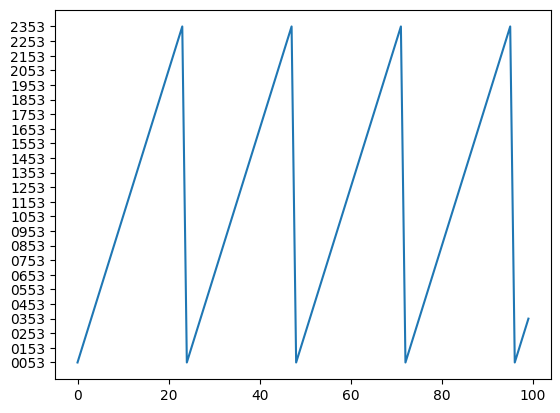

In [224]:
plt.plot(Partial_Split_METAR['time'][:100])

## Explore the METAR Dataset

In [54]:
# Length of data 
data_len = len(df)

In [23]:
Metar_test = df[0:5]

In [27]:
Metar_test

,airport_id,date,metar
0,KMIA,2014-01-01,KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A302...
1,KMIA,2014-01-01,KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A302...
2,KMIA,2014-01-01,KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 ...
3,KMIA,2014-01-01,KMIA 010353Z 07010KT 10SM OVC028 23/17 A3021 R...
4,KMIA,2014-01-01,KMIA 010453Z 07010KT 10SM OVC028 24/18 A3019 R...


In [231]:
metar_test_date = df['date']

In [235]:
metar_test_date_cleaned = metar_test_date.drop(problem_list)

In [236]:
metar_test_date_cleaned

0        2014-01-01
1        2014-01-01
2        2014-01-01
3        2014-01-01
4        2014-01-01
            ...    
89585    2023-12-31
89586    2023-12-31
89587    2023-12-31
89588    2023-12-31
89589    2023-12-31
Name: date, Length: 89451, dtype: object

In [238]:
dates_data = pd.to_datetime(metar_test_date_cleaned)
dates_df = pd.DataFrame({
    'year': dates_data.dt.year,
    'month': dates_data.dt.month,
    'day': dates_data.dt.day
})

In [317]:
data_index = dates_df.index

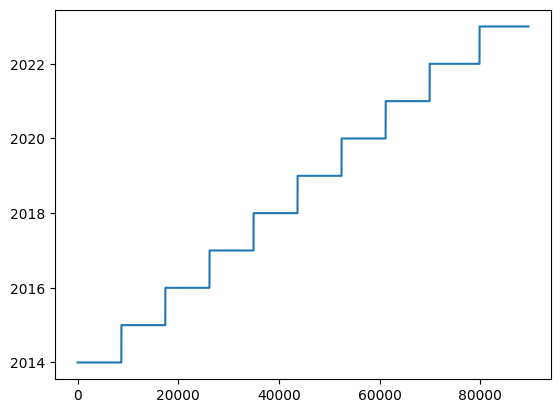

In [241]:
plt.plot(dates_df['year'])

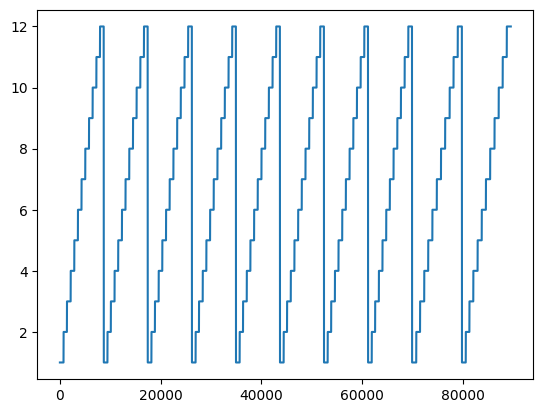

In [242]:
plt.plot(dates_df['month'])

In [32]:
A = Metar_test['metar'][0]

In [29]:
for a in range(len(Metar_test)):
    print(Metar_test['metar'][a])
    

KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021 RMK AO2 SLP229 T02330183
KMIA 010153Z 04009G15KT 10SM OVC023 23/18 A3021 RMK AO2 SLP231 T02330183
KMIA 010253Z 05009G19KT 10SM -RA OVC025 23/18 A3023 RMK AO2 RAB44 SLP236 P0000 60000 T02280178 51013
KMIA 010353Z 07010KT 10SM OVC028 23/17 A3021 RMK AO2 RAE09 SLP229 P0000 T02330172
KMIA 010453Z 07010KT 10SM OVC028 24/18 A3019 RMK AO2 SLP223 T02390178 402500194


### Test on MetarParser Package

In [33]:
metar_parsed = MetarParser().parse(A)


In [43]:
metar_parsed

Type:            Metar
String form:     Metar[day=1, time=00:53:00, message=KMIA 010053Z 04009G15KT 10SM OVC025 23/18 A3021 RMK AO2 SLP22 <...> eather_conditions=[], temperature=23, dew_point=18, altimeter=1023, nosig=False, runways_info=[]]
File:            /usr/local/lib/python3.10/dist-packages/metar_taf_parser/model/model.py
Docstring:       <no docstring>
Class docstring:
Helper class that provides a standard way to create an ABC using
inheritance.

In [44]:
metar_parsed.day

Type:        property
String form: <property object at 0x7fe7ca92b510>
Docstring:   <no docstring>

In [47]:
metar_dict = metar_parsed.__dict__

In [51]:
metar_dict['_wind']

Wind[speed=9, direction=NE, gust=15, degrees=40, unit=KT, min_variation=None, max_variation=None]

In [76]:
metar_parsed.wind

Wind[speed=9, direction=NE, gust=15, degrees=40, unit=KT, min_variation=None, max_variation=None]

In [45]:
dir(metar_parsed)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_altimeter',
 '_cavok',
 '_clouds',
 '_day',
 '_dew_point',
 '_flags',
 '_get_altimeter',
 '_get_cavok',
 '_get_clouds',
 '_get_day',
 '_get_dew_point',
 '_get_flags',
 '_get_message',
 '_get_remark',
 '_get_remarks',
 '_get_runways_info',
 '_get_station',
 '_get_temperature',
 '_get_time',
 '_get_trends',
 '_get_vertical_visibility',
 '_get_visibility',
 '_get_weather_conditions',
 '_get_wind',
 '_get_wind_shear',
 '_is_amendment',
 '_is_auto',
 '_is_canceled',
 '_is_corrected',
 '_is_nil',
 '_is_nosig',
 '_message',
 '_nosig',
 '_remark',
 '_remarks',
 '_runways_info'

## Create Full Metar Dictionary based on the Parsed METAR information.

In [86]:
# Create a full Metar Dict
# data_len = 89590
# parsed into several datasets based on years
# Get index for each datasets based on year
# Create list for the problematic index 

my_full_metar_dict = {}
problem_list = []
for i in range(data_len):
    try:
        my_metar = full_metar_df[i]
        my_parsed_metar = MetarParser().parse(my_metar)
        my_metar_dict = my_parsed_metar.__dict__
        my_metar_new_data = {i:my_metar_dict}
        my_full_metar_dict.update(my_metar_new_data)
    except Exception as e:
        problem_list.append(i)
        print(f"Problematic data at index {i}: {e}")  # Print the index of the problematic data and the exception

Problematic data at index 3183: can only concatenate str (not "NoneType") to str
Problematic data at index 14433: can only concatenate str (not "NoneType") to str
Problematic data at index 15575: can only concatenate str (not "NoneType") to str
Problematic data at index 25088: can only concatenate str (not "NoneType") to str
Problematic data at index 33188: invalid literal for int() with base 10: 'LV'
Problematic data at index 71982: invalid literal for int() with base 10: 'KM'
Problematic data at index 71984: invalid literal for int() with base 10: 'KM'
Problematic data at index 71987: invalid literal for int() with base 10: 'KM'
Problematic data at index 71989: invalid literal for int() with base 10: 'KM'
Problematic data at index 71993: invalid literal for int() with base 10: 'KM'
Problematic data at index 72011: invalid literal for int() with base 10: 'KM'
Problematic data at index 72012: invalid literal for int() with base 10: 'KM'
Problematic data at index 72014: invalid literal 

In [88]:
#Check on the following Problematic Data: 
len(problem_list)

139

In [32]:
problem_list

NameError: name 'problem_list' is not defined

In [93]:
### Look into what causing the problem
test_problem = problem_list[:5]
for a in test_problem :
    print( f"index {a} : {full_metar_df[a]}")

index 3183 : KMIA 151853Z 00000KT 7SM -TSRA FEW005 BKN012CB BKN250 26/23 A2998 RMK TORNADO B29 3 MILES WEST MOV NE TORNADO E37 AO2 RAE28B34 SLP152 OCNL LTGIC OHD-SW-N TS OHD-SW-N MOV NE P0019 T02610233
index 14433 : KMIA 281253Z 16005KT 10SM TS SCT020CB BKN250 29/26 A3001 RMK WATERSPOUT E38 DSIPTD AO2 TSB41 SLP162 FRQ LTGCG VC NE-E TS VC NE-E MOV N CB DSNT SE-S MOV N T02890256 $
index 15575 : KMIA 151153Z 36003KT 10SM FEW020TCU FEW120 SCT250 26/23 A3000 RMK FUNNEL CLOUD B13 10SE MOV STNRY FUNNEL CLOUD E33 AO2 SLP157 TCU DSNT N-E-S T02610233 10267 20250 53010
index 25088 : KMIA 142253Z 13004KT 10SM BKN040 BKN065 OVC200 25/19 A2997 RMK FUNNEL CLOUD E2155 DSIPTD CB DSNT W-NW AO2 SLP147 T02500194
index 33188 : SCGE 1822LVA1356 182200 FF KZCRZQZX KZMAZQZX MKJKZPZX MKJKZQZX MPTOZQZX MPZLZQZX MUFHZQZX MUHAZPZX 182200 SPIMZQZA (ARR-ABX2260-KMIA-SPJC2200)


## Parse specific data for ease of prediction and data catalog. Create Clean DF for Exploratory Data Analysis

In [ ]:
# Split metar_dataset into data bins
[Month, Day, Time, Wind, Visibility, Cloud, Temperature, Dew, AirPressure]

# Numerified everything for analysis. 


In [ ]:
# data_index contains all the data index skipping those included in the problem list data

In [332]:
def extract_data(the_dataset, keyword, output_list,data_index):
    """
    Extract specific information from the full metar dataset based on certain keywords
    """
    error_data = [] # just to check that the length is the same as what the original are. 
    for i in data_index:
        try:
            dat = the_dataset[i]
            new_data = dat[keyword]
            output_list.append(new_data)
        except Exception as e:
             error_data.append([i,e])
    print(f'length of the error list is : {len(error_data)}')
    return output_list

In [84]:
metar_dataset = my_full_metar_dict
#dat = items in metar_dataset

In [308]:
# Assuming my_full_metar_dict is your final dictionary
file_path = '../results/my_full_metar_dict.pkl'  # Specify the file path and name

# Save the dictionary into a binary file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(my_full_metar_dict, file)

print(f"The METAR data dictionary has been saved to {file_path}.")

The METAR data dictionary has been saved to ../results/my_full_metar_dict.pkl.


In [31]:
# this is how the data look
metar_dataset[29928]

NameError: name 'metar_dataset' is not defined

### Extract Time 

In [408]:
time_data = [] # dat["_wind"]
the_dataset = metar_dataset
keyword = '_time'
output_list = time_data

time_data = extract_data(the_dataset, keyword, output_list,data_index)

length of the error list is : 0


In [415]:
time_series = pd.Series(time_data)
time_series.index = data_index 

In [416]:
time_series[0].hour

0

In [417]:
time_series[0].minute

53

In [418]:
hour = []
minute = []
for i in data_index:
    try:
        hr = time_series[i].hour
        mins = time_series[i].minute
      
        ## append to corresponding list
        hour.append(hr)
        minute.append(mins)
        
    except Exception as e:
        print(f'error found on index {i}, {e} >>> Setting data all as 0')

In [482]:
hour_series = pd.Series(hour)

In [ ]:
### Explain Data Prediction Goals 

### Extract Wind Data

In [ ]:
# Format needed at least are wind_degree wind_speed, wind_peak, min_varVmax_var

In [333]:
wind_data = [] # dat["_wind"]
the_dataset = metar_dataset
keyword = '_wind'
output_list = wind_data

wind_data = extract_data(the_dataset, keyword, output_list,data_index)

length of the error list is : 0


In [334]:
len(wind_data)

89451

In [34]:
89590 - 89451

139

In [336]:
wind_series = pd.Series(wind_data)

In [337]:
wind_series.index = data_index

In [339]:
len(wind_series)

89451

In [342]:
# Parsed wind data into respective df 
wind_speed = []
wind_direction = []
wind_gust = []
wind_degrees = []
wind_unit = []
wind_min_var = []
wind_max_var = []
for i in data_index:
    try:
        speed = wind_series[i].speed
        direction = wind_series[i].direction
        gust = wind_series[i].gust
        degrees = wind_series[i].degrees
        unit = wind_series[i].unit
        min_var = wind_series[i].min_variation
        max_var = wind_series[i].max_variation
        
        ## append to corresponding list
        wind_speed.append(speed)
        wind_direction.append(direction)
        wind_gust.append(gust)
        wind_degrees.append(degrees)
        wind_unit.append(unit)
        wind_min_var.append(min_var)
        wind_max_var.append(max_var)
    except Exception as e:
        print(f'error found on index {i}, {e} >>> Setting data all as 0')
        
        # set NoneType or other problematic data as 0 
        wind_speed.append(0)
        wind_direction.append(0)
        wind_gust.append(0)
        wind_degrees.append(0)
        wind_unit.append(0)
        wind_min_var.append(0)
        wind_max_var.append(0)


error found on index 2380, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 3210, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 3852, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 4233, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 5002, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 5289, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 5604, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 6561, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 10183, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 10276, 'NoneType' object has no attribute 'speed' >>> Setting data all as 0
error found on index 12479, 'NoneType'

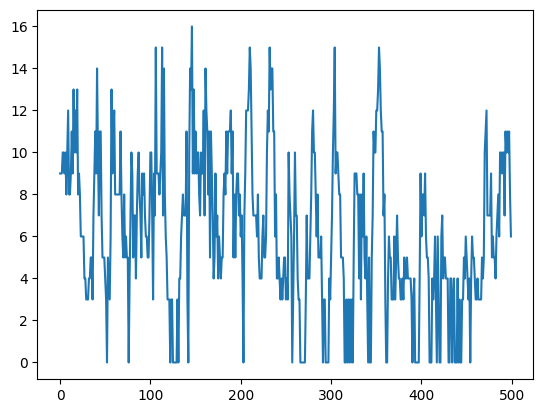

In [344]:
plt.plot(wind_speed[:500])

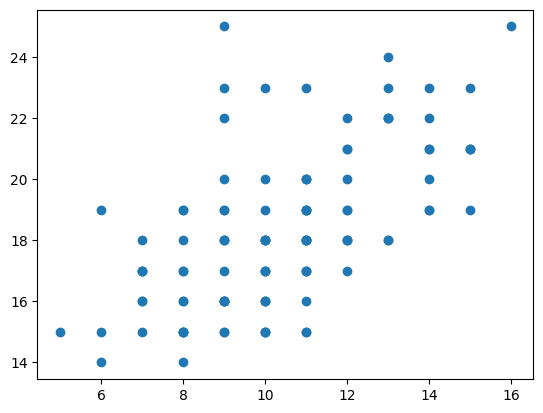

In [346]:
plt.scatter(wind_speed[:500],wind_gust[:500])

In [270]:
wind_data[0].speed

9

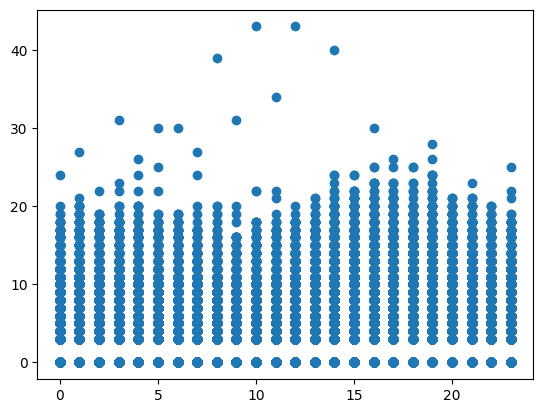

In [483]:
plt.scatter(hour_series,wind_speed) # Wind Speed Distribution 

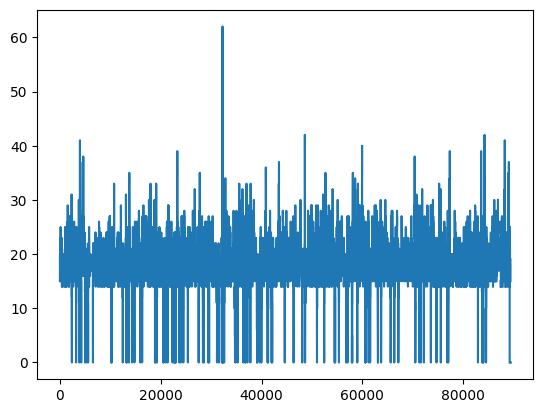

In [544]:
plt.plot(wind_gust_series)

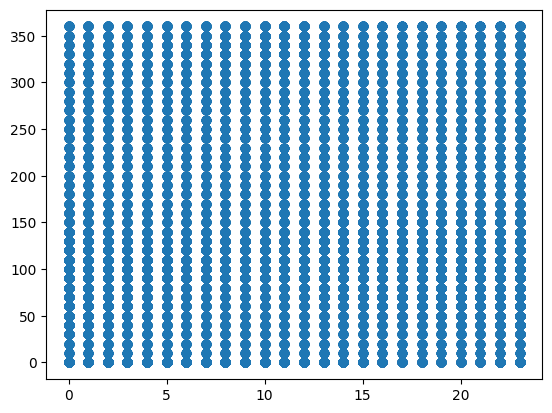

In [545]:
plt.scatter(hour_series,wind_degrees)

In [474]:
wind_speed_series = pd.Series(wind_speed)

In [476]:
cleaned_wind_speed_series = average_data_NaN(wind_speed_series)

In [475]:
wind_gust_series = pd.Series(wind_gust)

In [734]:
wind_degree_series = pd.Series(wind_degrees)
nan_index = wind_degree_series[wind_degree_series.isna()].index
print(len(nan_index))

4041


In [742]:
cleaned_wind_degree_series = average_data_NaN(wind_degree_series)

In [745]:
nan_index = cleaned_wind_degree_series[cleaned_wind_degree_series.isna()].index
print(len(nan_index))

0


In [735]:
nan_index[:5]

Index([32, 70, 84, 170, 258], dtype='int64')

In [541]:
#check_gust NaN
nan_mask = wind_gust_series.isna()

In [542]:
len(nan_mask)

89451

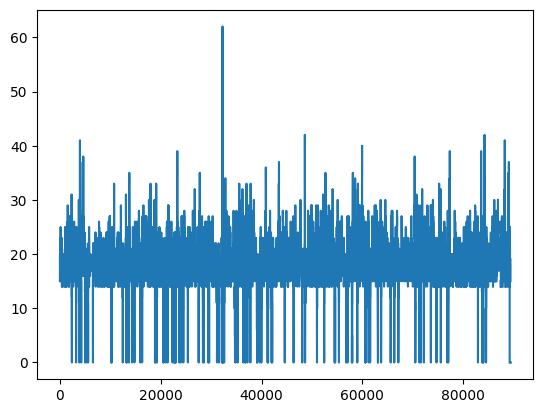

In [543]:
plt.plot(wind_gust_series) 

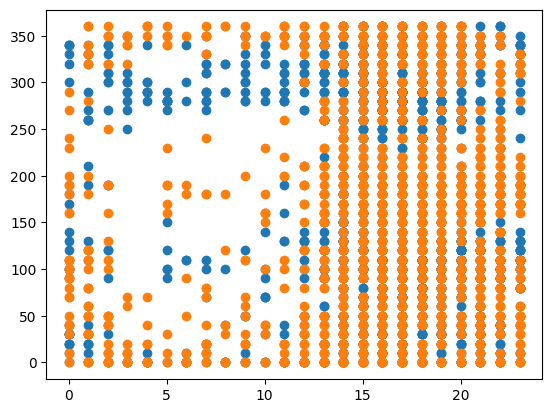

In [548]:
plt.scatter(hour_series,wind_min_var)
plt.scatter(hour_series,wind_max_var)

In [9]:
wind_min_var = raw_METAR_data['wind_min_ver']
wind_max_var = raw_METAR_data['wind_max_var']

In [8]:
wind_var_series = pd.Series(wind_min_var)
nan_index = wind_var_series[wind_var_series.isna()].index
print(len(nan_index))

87926


In [10]:
wind_var_series2 = pd.Series(wind_max_var)
nan_index = wind_var_series2[wind_var_series2.isna()].index
print(len(nan_index))

87926


### Extract Visibility Data

In [348]:
visibility_data = [] 
the_dataset = metar_dataset
keyword = '_visibility'
output_list = visibility_data

visibility_data = extract_data(the_dataset, keyword, output_list,data_index)

length of the error list is : 0


In [349]:
visibility_data[0]

Visibility[distance=10SM, min_distance=None, min_direction=None]

In [350]:
vis_series = pd.Series(visibility_data)
vis_series.index = data_index 

In [355]:
vis_series[0].distance

'10SM'

In [358]:
vis_series[9023]

In [363]:
vis_distance = []
vis_min_dis = []
vis_min_dir = []
for i in data_index:
    try:
        distance = vis_series[i].distance
        min_dis = vis_series[i].min_distance
        min_dir = vis_series[i].min_direction
      
        
        ## append to corresponding list
        vis_distance.append(distance)
        vis_min_dis.append(min_dis)
        vis_min_dir.append(min_dir)
    except Exception as e:
        print(f'error found on index {i}, {e} >>> Setting data all as 0')
        
        # set NoneType or other problematic data as 0 # decide action based on data type
        # visibility close to zero represented as 1/16 and the like is nullified 
        vis_distance.append(0)
        vis_min_dis.append(0)
        vis_min_dir.append(0)

error found on index 9023, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 9024, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 9025, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 27164, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 27541, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 27542, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 27543, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 27544, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 27545, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
error found on index 28933, 'NoneType' object has no attribute 'distance' >>> Setting data all as 0
err

In [365]:
vis_distance[:5]

['10SM', '10SM', '10SM', '10SM', '10SM']

In [371]:
cleaned_vis_distance = [str(item).replace('SM', '') for item in vis_distance] # Removing SM

In [398]:
vis_series = pd.Series(cleaned_vis_distance)
vis_series.describe()

count     89451
unique       21
top          10
freq      84421
dtype: object

In [402]:
vis_series[0] # need to convert into integers, or float. Identify those that are not normal. 

'10'

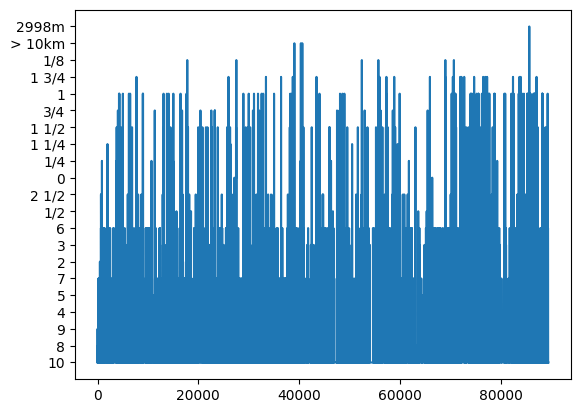

In [373]:
plt.plot(cleaned_vis_distance) # need to convert some of the data that is not in SM into SM
# check and convert for (fraction)
# convert m and km to SM

In [485]:
def non_integer_masking(data_series):
    """
    non integer data masking
    return a list containing indices of non_integer data in the series
    """
    s = data_series
    # Check for non-integer values and collect their indices
    # Using apply() to check each value with a custom function
    non_integer_mask = s.apply(lambda x: not isinstance(x, int))
    non_integer_indices = s.index[non_integer_mask]
    
    # Convert the Index object to a list (optional)
    non_integer_indices_list = non_integer_indices.tolist()
    return non_integer_indices_list

In [532]:
def convert_to_float_and_mark(data_list):
    """
    Convert all element in a list into integer, marking the indices of data that are non-numeric
    """
   
    
    # Initialize an empty list to store converted integers or original data
    converted_data = []
    # Initialize a list to mark indices of non-numeric data
    non_numeric_indices = []
    
    # Iterate through the list, converting elements to integers when possible
    for index, item in enumerate(data_list):
        try:
            # Attempt to convert the item to a float
            converted_data.append(float(item))
        except ValueError:
            # If conversion fails, append the original item and mark the index
            converted_data.append(item)
            non_numeric_indices.append(index)
    
    # Create a pandas Series from the converted data
    s = pd.Series(converted_data)
    return s

In [ ]:
def mixed_fraction_to_decimal(fraction_str):
    parts = fraction_str.split()
    if len(parts) == 2:  # Contains a whole number and a fraction
        whole_number = int(parts[0])
        fraction = parts[1]
    elif len(parts) == 1:  # Contains only a fraction
        whole_number = 0
        fraction = parts[0]
    else:
        raise ValueError("Invalid fraction format")
    
    numerator, denominator = map(int, fraction.split('/'))
    decimal_fraction = numerator / denominator
    return whole_number + decimal_fraction

# Convert each mixed fraction to a decimal
# decimals = [mixed_fraction_to_decimal(frac) for frac in mixed_fractions]

In [523]:
def meters_to_miles(meters):
    miles = meters / 1609.34
    return miles

In [524]:
meters_to_miles(2998) # 2 miles

1.8628754644761207

In [525]:
meters_to_miles(10000) # 2 miles

6.213727366498068

In [531]:
1/8

0.125

In [533]:
data_list = cleaned_vis_distance
vis_distance_int = convert_to_float_and_mark(data_list)

In [534]:
data_series = pd.Series(vis_distance_int)
fixed_vis_distance = data_series.replace({'> 10km': 6.0, '2998m': 2.0,
                                         '1/2':0.5,'2 1/2':2.5, '1/4':0.25, '1 1/4':1.25, '1 1/2':1.5,
                                         '3/4':0.75, '1 3/4':1.35, '1/8':0.125}) # special treatment for special data


/tmp/ipykernel_213059/3652818221.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixed_vis_distance = data_series.replace({'> 10km': 6.0, '2998m': 2.0,


In [508]:
fraction_list  = vis_distance_int[vis_distance_fix_list]

In [510]:
# Identify strings that end with 'm'
data = fraction_list
ends_with_m = [item for item in data if item.endswith('m')]

In [511]:
ends_with_m

['> 10km', '> 10km', '> 10km', '2998m']

In [519]:
fraction_series= pd.Series(fraction_list)

In [514]:
# Identify strings that end with 'm' and their indices
data = fraction_list
ends_with_m_info = [(index, item) for index, item in enumerate(data) if item.endswith('m')]

# Print the filtered list with indices
print("Indices and strings that end with 'm':")
for index, item in ends_with_m_info:
    print(f"Index: {index}, Value: {item}")

Indices and strings that end with 'm':
Index: 127, Value: > 10km
Index: 129, Value: > 10km
Index: 130, Value: > 10km
Index: 384, Value: 2998m


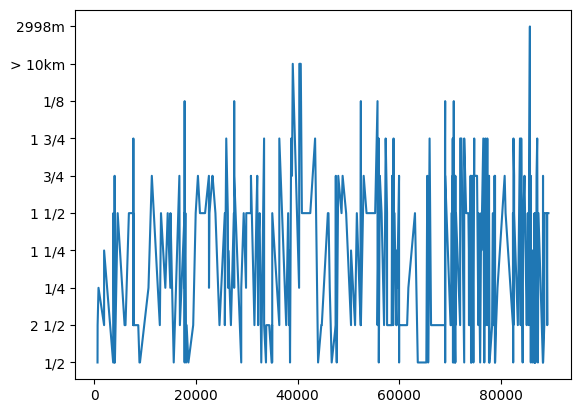

In [509]:
plt.plot(fraction_list)

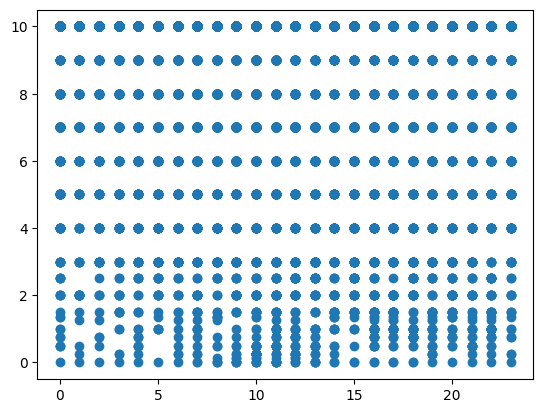

In [537]:
plt.scatter(hour_series,fixed_vis_distance)

### Extract Cloud Information

In [374]:
cloud_data = [] 
the_dataset = metar_dataset
keyword = '_clouds'
output_list = cloud_data

cloud_data = extract_data(the_dataset, keyword, output_list,data_index)

length of the error list is : 0


In [554]:
cloud_series = pd.Series(cloud_data)

In [565]:
cloud_data

[[Cloud[height=2500, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2300, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2500, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2800, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2800, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2300, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2300, quantity=CloudQuantity.BKN, type=None],
  Cloud[height=2700, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2300, quantity=CloudQuantity.BKN, type=None],
  Cloud[height=2900, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2500, quantity=CloudQuantity.BKN, type=None],
  Cloud[height=4000, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2100, quantity=CloudQuantity.FEW, type=None],
  Cloud[height=2900, quantity=CloudQuantity.BKN, type=None],
  Cloud[height=4600, quantity=CloudQuantity.OVC, type=None]],
 [Cloud[height=2000, quantity=CloudQuantity.SCT, type=None],
  Cloud[height

In [619]:
cloud_series_0 = cloud_series[index_n_cloud_layers_0]
cloud_series_1 = cloud_series[index_n_cloud_layers_1]
cloud_series_2 = cloud_series[index_n_cloud_layers_2]
cloud_series_3 = cloud_series[index_n_cloud_layers_3]
cloud_series_4 = cloud_series[index_n_cloud_layers_4]
cloud_series_5 = cloud_series[index_n_cloud_layers_5]
cloud_series_6 = cloud_series[index_n_cloud_layers_6]

In [692]:
# 0 Layer case 
cloud_n0_dict ={
    'index_list':index_n_cloud_layers_0
}

In [715]:
# 1 Layer_case 
cloud_series_1_height = []
cloud_series_1_quantity = []
cloud_series_1_quantity_num = []
for i in index_n_cloud_layers_1:
    height = cloud_series_1[i][0].height
    quantity = cloud_series_1[i][0].quantity
    quantity_num = cloud_category_encoding[quantity.value]
    cloud_series_1_height.append(height)
    cloud_series_1_quantity.append(quantity)
    cloud_series_1_quantity_num.append(quantity_num)


In [716]:
def extract_cloud_layer(cloud_layer_index, cloud_series, cloud_category_encoding, layer):
    """
    cloud_layer_index containing index of specific cloud layer,
    cloud series is the original cloud data series
    encoding is the cloud type encoding:
    cloud_category_encoding = {'NSC':0, 'FEW': 1, 'SCT': 2, 'BKN':5, 'OVC':8}
    layer value is which layer to extract, value = 1-7
    """
    cloud_height = []
    cloud_quantity = []
    cloud_quantity_num = []
    for i in cloud_layer_index:
        height = cloud_series[i][layer-1].height
        quantity = cloud_series[i][layer-1].quantity
        quantity_num = cloud_category_encoding[quantity.value]
        cloud_height.append(height)
        cloud_quantity.append(quantity)
        cloud_quantity_num.append(quantity_num)

    cloud_datadict = {
    'height':cloud_height,
    'quantity':cloud_quantity,
    'quantity_num':cloud_quantity_num,
    }
    return cloud_datadict

### Update by creating a dict directly, then loop can be done over layers, giving yet another dict. 

In [ ]:
# FEW 1 
# SCT 3
# BKN 5
# OVC 8
# CLR 12
# NSC 0 
# SKC 0 
# NCD 0 
# 0 can be NSC SKC or NCD
cloud_category_encoding = {'NSC':0, 'FEW': 1, 'SCT': 2, 'BKN':5, 'OVC':8}

In [711]:
cloud_n1_datadict = {
    'height':cloud_series_1_height,
    'quantity':cloud_series_1_quantity,
    'quantity_num':cloud_series_1_quantity_num
}

In [718]:
cloud_n1_dict ={
    'index_list':index_n_cloud_layers_1,
    'cloud_series':cloud_series_1,
    'layer_1': cloud_n1_datadict,
}

In [719]:
cloud_n1_dict['cloud_series']

0        [Cloud[height=2500, quantity=CloudQuantity.OVC...
1        [Cloud[height=2300, quantity=CloudQuantity.OVC...
2        [Cloud[height=2500, quantity=CloudQuantity.OVC...
3        [Cloud[height=2800, quantity=CloudQuantity.OVC...
4        [Cloud[height=2800, quantity=CloudQuantity.OVC...
                               ...                        
89436    [Cloud[height=3000, quantity=CloudQuantity.FEW...
89444    [Cloud[height=4000, quantity=CloudQuantity.FEW...
89446    [Cloud[height=25000, quantity=CloudQuantity.FE...
89447    [Cloud[height=25000, quantity=CloudQuantity.FE...
89448    [Cloud[height=25000, quantity=CloudQuantity.FE...
Length: 17629, dtype: object

In [727]:
cloud_layer_index = index_n_cloud_layers_2
cloud_series = cloud_series_2
###
cloud_n2_dict ={
    'index_list':cloud_layer_index,
    'cloud_series':cloud_series
}
for l in [1,2]:
    layer = l 
    data = extract_cloud_layer(cloud_layer_index, cloud_series, cloud_category_encoding, layer)
    new_data = {f'layer_{l}' : data}
    cloud_n2_dict.update(new_data)


In [728]:
cloud_n2_dict.keys()

dict_keys(['index_list', 'cloud_series', 'layer_1', 'layer_2'])

In [726]:
cloud_layer_index = index_n_cloud_layers_3
cloud_series = cloud_series_3
###
cloud_n3_dict ={
    'index_list':cloud_layer_index,
    'cloud_series':cloud_series
}
for l in [1,2,3]:
    layer = l 
    data = extract_cloud_layer(cloud_layer_index, cloud_series, cloud_category_encoding, layer)
    new_data = {f'layer_{l}' : data}
    cloud_n3_dict.update(new_data)


In [729]:
cloud_layer_index = index_n_cloud_layers_4
cloud_series = cloud_series_4
###
cloud_n4_dict ={
    'index_list':cloud_layer_index,
    'cloud_series':cloud_series
}
for l in [1,2,3,4]:
    layer = l 
    data = extract_cloud_layer(cloud_layer_index, cloud_series, cloud_category_encoding, layer)
    new_data = {f'layer_{l}' : data}
    cloud_n4_dict.update(new_data)


In [730]:
cloud_layer_index = index_n_cloud_layers_5
cloud_series = cloud_series_5
###
cloud_n5_dict ={
    'index_list':cloud_layer_index,
    'cloud_series':cloud_series
}
for l in [1,2,3,4,5]:
    layer = l 
    data = extract_cloud_layer(cloud_layer_index, cloud_series, cloud_category_encoding, layer)
    new_data = {f'layer_{l}' : data}
    cloud_n5_dict.update(new_data)

In [731]:
cloud_layer_index = index_n_cloud_layers_6
cloud_series = cloud_series_6
###
cloud_n6_dict ={
    'index_list':cloud_layer_index,
    'cloud_series':cloud_series
}
for l in [1,2,3,4,5,6]:
    layer = l 
    data = extract_cloud_layer(cloud_layer_index, cloud_series, cloud_category_encoding, layer)
    new_data = {f'layer_{l}' : data}
    cloud_n6_dict.update(new_data)

In [708]:
cloud_layer_index = index_n_cloud_layers_4
cloud_series = cloud_series_4
###
layer=1
cloud_n4_1_height, cloud_n4_1_quantity, cloud_n4_1_quantity_num = extract_cloud_layer(cloud_layer_index, cloud_series, 
                                                                                      cloud_category_encoding, layer)
###
layer=2
cloud_n4_2_height, cloud_n4_2_quantity, cloud_n4_2_quantity_num = extract_cloud_layer(cloud_layer_index, cloud_series, 
                                                                                      cloud_category_encoding, layer)
###
layer=3
cloud_n4_3_height, cloud_n4_3_quantity, cloud_n4_3_quantity_num = extract_cloud_layer(cloud_layer_index, cloud_series, 
                                                                                      cloud_category_encoding, layer)
###
layer=4
cloud_n4_4_height, cloud_n4_4_quantity, cloud_n4_4_quantity_num = extract_cloud_layer(cloud_layer_index, cloud_series, 
                                                                                      cloud_category_encoding, layer)

In [709]:
cloud_n4_dict ={
    'index_list':index_n_cloud_layers_2,
    'height_1': cloud_n4_1_height,
    'quantity_1':cloud_n4_1_quantity,
    'quantity_1_num': cloud_n4_1_quantity_num,
    'height_2': cloud_n4_2_height,
    'quantity_2':cloud_n4_2_quantity,
    'quantity_2_num': cloud_n4_2_quantity_num,
    'height_3': cloud_n4_3_height,
    'quantity_3':cloud_n4_3_quantity,
    'quantity_3_num': cloud_n4_3_quantity_num,
     'height_4': cloud_n4_4_height,
    'quantity_4':cloud_n4_4_quantity,
    'quantity_4_num': cloud_n4_4_quantity_num,
}

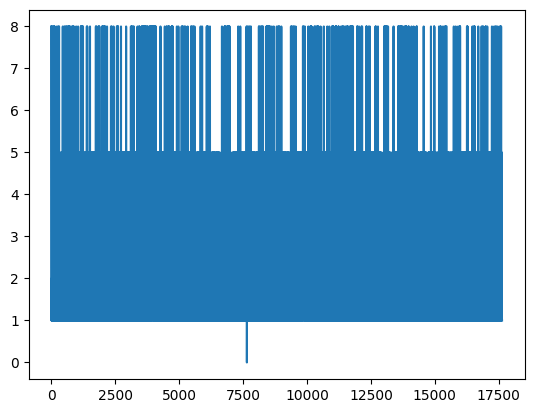

In [690]:
plt.plot( cloud_series_1_quantity_num)

In [646]:
cloud_n1_dict.keys()

dict_keys(['index_list', 'height', 'quantity'])

In [650]:
pd.Series(cloud_n1_dict['quantity_1']).value_counts()

CloudQuantity.FEW    9727
CloudQuantity.SCT    4307
CloudQuantity.BKN    2686
CloudQuantity.OVC     908
CloudQuantity.NSC       1
Name: count, dtype: int64

In [656]:
cloud_n1_dict['quantity_1']

[overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 broken,
 few,
 scattered,
 few,
 few,
 few,
 few,
 few,
 few,
 few,
 scattered,
 scattered,
 scattered,
 scattered,
 scattered,
 scattered,
 few,
 few,
 few,
 few,
 scattered,
 scattered,
 broken,
 few,
 overcast,
 overcast,
 scattered,
 few,
 few,
 few,
 few,
 few,
 scattered,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 overcast,
 few,
 scattered,
 few,
 few,
 few,
 few,
 few,
 few,
 few,
 scattered,
 few,
 few,
 few,
 scattered,
 broken,
 broken,
 few,
 few,
 few,
 scattered,
 few,
 few,
 scattered,
 few,
 few,
 scattered,
 broken,
 scattered,
 few,
 few,
 few,
 few,
 scattered,
 few,
 broken,
 broken,
 broken,
 few,
 scattered,
 few,
 overcast,
 few,
 broken,
 broken,
 overcast,
 broken,
 overcast,
 overcast,
 overcast,
 

In [671]:
quantity_1_numeric?

0        CloudQuantity.OVC
1        CloudQuantity.OVC
2        CloudQuantity.OVC
3        CloudQuantity.OVC
4        CloudQuantity.OVC
               ...        
17624    CloudQuantity.FEW
17625    CloudQuantity.FEW
17626    CloudQuantity.FEW
17627    CloudQuantity.FEW
17628    CloudQuantity.FEW
Length: 17629, dtype: object

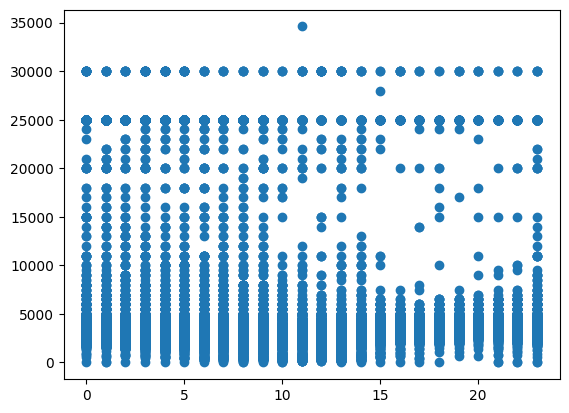

In [643]:
plt.scatter(hour_series[index_n_cloud_layers_1],cloud_series_1_height)

In [639]:
cloud_series_1[0][]

[Cloud[height=2500, quantity=CloudQuantity.OVC, type=None]]

In [ ]:
cloud_series_6[66568][0]

In [628]:
index_n_cloud_layers_6

[66568]

In [ ]:
height_cloud_layers_1 = 

In [283]:
cloud_data[0][0].height

2500

In [289]:
cloud_data[0][0].quantity

overcast

In [288]:
cloud_data[800] 
# Cloud data can be of several layers, so when extracting, 
# check that it is based on the length of the data in each line

[Cloud[height=3400, quantity=CloudQuantity.FEW, type=None],
 Cloud[height=11000, quantity=CloudQuantity.SCT, type=None]]

In [ ]:
# tough nut, need to work on this later

In [ ]:
cloud_layer_1
cloud_layer_2
cloud_layer_3 

# [none if not found] assign none

In [567]:
N_cloud_layers_list = []
# get the number of cloud layers
for i in range(len(cloud_data)):
    n_cloud = len(cloud_data[i])
    N_cloud_layers_list.append(n_cloud)

In [572]:
# Create 7 lists for indices of elements 0 through 6
data_list = N_cloud_layers_list
cloud_indices_lists = [[index for index, value in enumerate(data_list) if value == number] for number in range(7)]


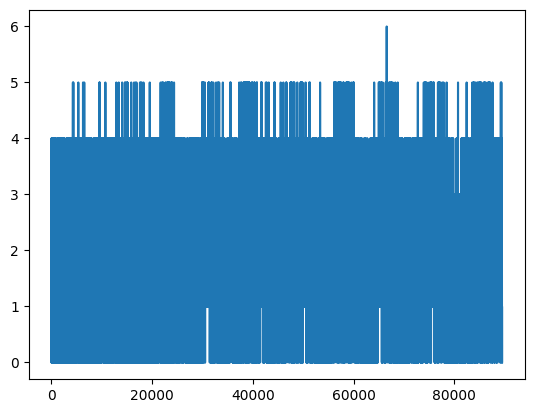

In [749]:
plt.plot(N_cloud_layers_list)

In [571]:
pd.Series(N_cloud_layers_list).value_counts()

2    29490
3    27245
1    17629
4     9752
0     5013
5      321
6        1
Name: count, dtype: int64

In [577]:
cloud_layer_series = pd.Series(N_cloud_layers_list)

In [574]:
cloud_indices_lists[0]

[31,
 32,
 33,
 35,
 50,
 51,
 52,
 55,
 123,
 128,
 129,
 130,
 239,
 240,
 241,
 242,
 243,
 264,
 265,
 267,
 291,
 292,
 344,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 407,
 408,
 411,
 412,
 413,
 414,
 418,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 577,
 578,
 579,
 580,
 581,
 585,
 590,
 624,
 625,
 626,
 627,
 629,
 630,
 637,
 638,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 745,
 825,
 851,
 869,
 870,
 871,
 872,
 875,
 876,
 877,
 889,
 938,
 939,
 970,
 1014,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1054,
 1055,
 1056,
 1057,
 1058,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1102,
 1103,
 1104,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1126,
 1127,
 1128,
 1129,
 1135,
 1180,
 1184,
 1236,
 1250,
 1279,
 1303,
 1323

In [609]:
index_n_cloud_layers_0 = cloud_indices_lists[0]
index_n_cloud_layers_1 = cloud_indices_lists[1]
index_n_cloud_layers_2 = cloud_indices_lists[2]
index_n_cloud_layers_3 = cloud_indices_lists[3]
index_n_cloud_layers_4 = cloud_indices_lists[4]
index_n_cloud_layers_5 = cloud_indices_lists[5]
index_n_cloud_layers_6 = cloud_indices_lists[6]

In [604]:
A = index_n_cloud_layers_0.values

In [610]:
index_n_cloud_layers_6

[66568]

In [611]:
index_n_cloud_layers_5

[4314,
 4406,
 4407,
 5389,
 6319,
 6568,
 9560,
 9561,
 9647,
 10759,
 12930,
 13408,
 14087,
 14632,
 14725,
 15013,
 15108,
 15111,
 15128,
 15892,
 15894,
 16443,
 16731,
 16924,
 17619,
 17622,
 17781,
 17958,
 17959,
 18318,
 19562,
 19563,
 19564,
 19565,
 19567,
 21720,
 21991,
 21992,
 22102,
 22292,
 22724,
 22726,
 22819,
 23138,
 23169,
 23234,
 23235,
 23238,
 23242,
 23289,
 23409,
 23427,
 23428,
 23429,
 23763,
 23861,
 23862,
 23922,
 24004,
 24380,
 24381,
 29945,
 29946,
 29967,
 30009,
 30034,
 30110,
 30131,
 30280,
 30496,
 31232,
 31238,
 31281,
 31308,
 31799,
 31834,
 31881,
 32170,
 32720,
 33050,
 33169,
 33319,
 33334,
 33335,
 33336,
 34061,
 35503,
 35626,
 37298,
 37635,
 37761,
 38155,
 38250,
 38322,
 38323,
 38324,
 38534,
 38572,
 38766,
 38807,
 38906,
 39077,
 39100,
 39118,
 39244,
 39247,
 39268,
 39283,
 39311,
 39754,
 39756,
 39842,
 39861,
 39863,
 40007,
 40319,
 40364,
 40818,
 40822,
 40823,
 41676,
 41704,
 41727,
 41762,
 42593,
 42770,
 

In [ ]:
Predict number of Cloud Layers.
Then predict the quantification of cloud layer

In [ ]:
Check the distribution of cloud layer, 1 2 3 layers, along the years and days, etc.

### Extract Temperature Data

In [375]:
temperature_data = [] 
the_dataset = metar_dataset
keyword = '_temperature'
output_list = temperature_data

temperature_data = extract_data(the_dataset, keyword, output_list,data_index)

length of the error list is : 0


In [382]:
from matplotlib.colors import ListedColormap, Normalize

In [383]:
# custom color map for each year 
# Define custom colors for each year
year_colors = {
    2014: 'red',
    2015: 'blue',
    2016: 'green',
    2017: 'orange',
    2018: 'purple',
    2019: 'brown',
    2020: 'pink',
    2021: 'gray',
    2022: 'olive',
    2023: 'cyan',
}
# Need to work on Transparency

# Create a list of colors in the order of years
colors_in_order = [year_colors[year] for year in sorted(year_colors)]

# Create a ListedColormap with the specified colors
cmap = ListedColormap(colors_in_order)

# Normalize object to map the years (2014-2023) to the colormap
norm = Normalize(vmin=2014, vmax=2023)

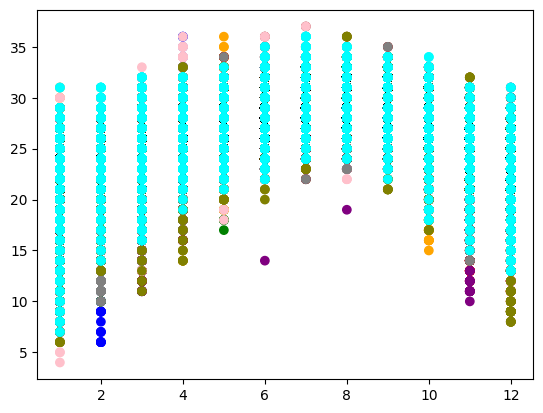

In [385]:
plt.scatter(dates_df['month'],temperature_data,c=dates_df['year'], cmap=cmap, norm=norm)

In [ ]:
# Assess sort of temperature distribution over the years, mean value etc

In [ ]:
Color this based on the year

In [397]:
temperature_series = pd.Series(temperature_data)
temperature_series.describe()

count    89388.000000
mean        25.669262
std          4.117142
min          4.000000
25%         23.000000
50%         26.000000
75%         28.000000
max         37.000000
dtype: float64

In [428]:
temperature_series

0        23.0
1        23.0
2        23.0
3        23.0
4        24.0
         ... 
89446    21.0
89447    21.0
89448    21.0
89449    19.0
89450    18.0
Length: 89451, dtype: float64

In [470]:
cleaned_temperature_series = average_data_NaN(temperature_series)

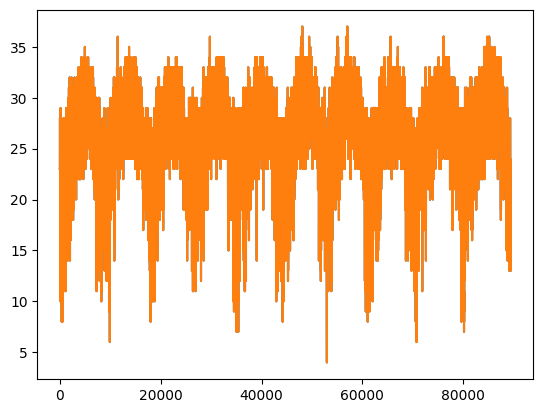

In [471]:
plt.plot(cleaned_temperature_series)
plt.plot(temperature_series)

### Extract DEW data

In [386]:
dew_data = [] 
the_dataset = metar_dataset
keyword = '_dew_point'
output_list = dew_data

dew_data = extract_data(the_dataset, keyword, output_list,data_index)

length of the error list is : 0


In [294]:
dew_data[0]

18

In [396]:
dew_series = pd.Series(dew_data)
dew_series.describe()

count    89388.000000
mean        20.049839
std          4.535081
min         -8.000000
25%         18.000000
50%         21.000000
75%         23.000000
max         28.000000
dtype: float64

In [469]:
# Function to find closest non-NaN indices
def find_closest_indices(target_index, available_indices, count=3):
    # Calculate the absolute distance from the target index
    distances = np.abs(available_indices - target_index)
    # Get indices of the smallest distances
    closest_indices = available_indices[np.argsort(distances)[:count]]
    return closest_indices
    
def average_data_NaN(my_data_series):
    """
    Finding NaN in Data and averaged out based on the 3 non-NaN data points before and after the NaN
    """
    s = my_data_series

    # Find indices of all non-NaN values
    non_nan_indices = s.dropna().index
    # # Find indices of all non-NaN and non-zero values
    # non_nan_non_zero_indices = s[s != 0].dropna().index  
    
    # Replace NaN values
    for i in s[s.isna()].index:
        # Find the closest 3 non-NaN indices before and after the NaN value
        closest_indices = find_closest_indices(i, non_nan_indices, count=3)
        # Calculate mean of the closest non-NaN values
        mean_value = s.iloc[closest_indices].mean()
        # Replace NaN with calculated mean in original dataset
        s.at[i] = int(round(mean_value)) # rounded to nearest integer
        
    return s


In [437]:
# Data Check : then save data after check and fixes
nan_mask = dew_series.isna()

In [442]:
nan_index = list(dew_series[nan_mask].index)
print(nan_index)

[2380, 2383, 10442, 14054, 14638, 14692, 14904, 20797, 20798, 22630, 23223, 25763, 25766, 32144, 32264, 32265, 32266, 32267, 32268, 32269, 32270, 32271, 32272, 32273, 32274, 32275, 32276, 32277, 32278, 32279, 32280, 32281, 32282, 32283, 32284, 32285, 32286, 32287, 32288, 32289, 32290, 32291, 32292, 40625, 43399, 47165, 48622, 55354, 55355, 55596, 60048, 60578, 60602, 60603, 65582, 65605, 65628, 65632, 65665, 65691, 65702, 85654, 87241]


In [ ]:
# produce cleaned dew_series

In [465]:
cleaned_dew_series = average_data_NaN(dew_series)

In [466]:
cleaned_dew_series

0        18.0
1        18.0
2        18.0
3        17.0
4        18.0
         ... 
89446     8.0
89447     9.0
89448     8.0
89449     9.0
89450     9.0
Length: 89451, dtype: float64

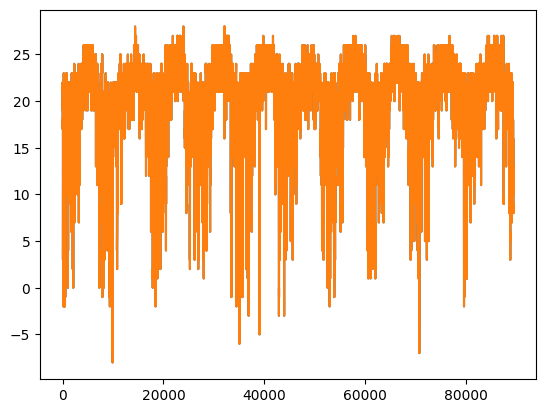

In [467]:
plt.plot(dew_data)
plt.plot(cleaned_dew_series)

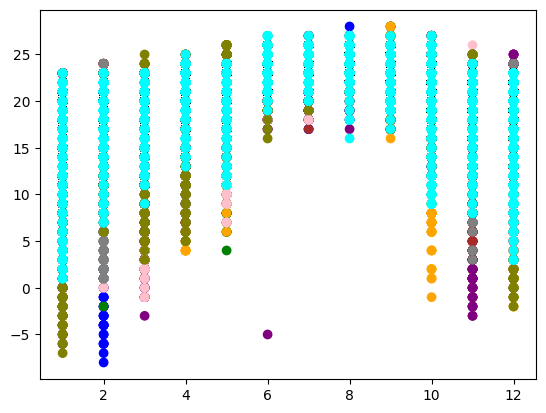

In [388]:
plt.scatter(dates_df['month'],dew_data,c=dates_df['year'], cmap=cmap, norm=norm)

## Extract AirPressure Data

In [390]:
air_pressure_data = [] 
the_dataset = metar_dataset
keyword = '_altimeter'
output_list = air_pressure_data

air_pressure_data = extract_data(the_dataset, keyword, output_list,data_index)

length of the error list is : 0


In [297]:
air_pressure_data[0] # in hPA

1023

In [393]:
air_pressure_series = pd.Series(air_pressure_data)

In [395]:
air_pressure_series.describe()

count    89442.000000
mean      1016.564276
std          3.559299
min        989.000000
25%       1014.000000
50%       1017.000000
75%       1019.000000
max       1033.000000
dtype: float64

In [472]:
cleaned_air_pressure_series = average_data_NaN(air_pressure_series)

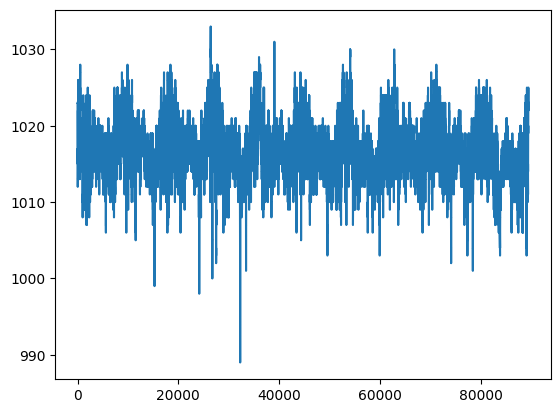

In [391]:
plt.plot(air_pressure_data)

### Combine and organize the data 

In [304]:
Cleaned_METAR_dict = {
    'year': dates_df['year'],
    'month': dates_df['month'],
    'day' : dates_df['day'],
    'wind': pd.Series(wind_data),
    'visibility': pd.Series(visibility_data),
    'clouds' : pd.Series(cloud_data),
    'temperature' : pd.Series(temperature_data),
    'dew': pd.Series(dew_data),
    'air_pressure' : pd.Series(air_pressure_data)
}

In [305]:
Cleaned_METAR_dict.keys()

dict_keys(['year', 'month', 'day', 'wind', 'visibility', 'clouds', 'temperature', 'dew', 'air_pressure'])

In [306]:
file_path = '../results/Cleaned_METAR_dict.pkl'  # Specify the file path and name

# Save the dictionary into a binary file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(Cleaned_METAR_dict, file)
print(f"The data has been saved to {file_path}.")

The data has been saved to ../results/Cleaned_METAR_dict.pkl.


In [752]:
Full_Cleaned_METAR_dict = {
    'year': dates_df['year'],
    'month': dates_df['month'],
    'day' : dates_df['day'],
    'hour': pd.Series(hour),
    'minute':pd.Series(minute),
       'wind_speed': cleaned_wind_speed_series,
        'wind_direction':wind_direction,
        'wind_gust':wind_gust,
        'wind_degrees':cleaned_wind_degree_series,
        'wind_unit':wind_unit,
        'wind_min_ver':wind_min_var,
        'wind_max_var':wind_max_var,
        'visibility_distance':fixed_vis_distance,
        'visibility_min_dis': vis_min_dis,
        'visibility_min_dir': vis_min_dir,
    'clouds' :cloud_data,
    'n_cloud_layers':pd.Series(N_cloud_layers_list),
    'clouds_0_layer':cloud_n0_dict,
    'clouds_1_layer':cloud_n1_dict,
    'clouds_2_layer':cloud_n2_dict,
    'clouds_3_layer':cloud_n3_dict,
    'clouds_4_layer':cloud_n4_dict,
    'clouds_5_layer':cloud_n5_dict,
    'clouds_6_layer':cloud_n6_dict,
    'temperature' : cleaned_temperature_series,
    'dew': cleaned_dew_series,
    'air_pressure' : cleaned_air_pressure_series
}

In [12]:
Full_cleaned_METAR_dict = raw_METAR_data
new_data = {'wind_min_var':wind_min_var}
Full_cleaned_METAR_dict.update(new_data)


In [29]:
new_data = {'bool_wind_min_var':bool_wind_min_var,
            'bool_wind_max_var':bool_wind_max_var}
Full_cleaned_METAR_dict.update(new_data)

# Remove the key and its value
key_to_remove = 'wind_min_ver'
removed_value = Full_cleaned_METAR_dict.pop(key_to_remove, None) 

In [18]:
wind_min_var_s = pd.Series(wind_min_var)
bool_wind_min_var = wind_min_var_s.notnull().astype(int)

In [20]:
wind_max_var_s = pd.Series(wind_max_var)
bool_wind_max_var = wind_max_var_s.notnull().astype(int)

In [23]:
hour = raw_METAR_data['hour']

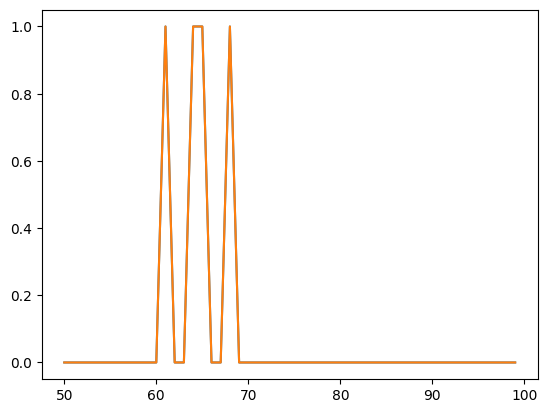

In [27]:
plt.plot(bool_wind_max_var[50:100])
plt.plot(bool_wind_min_var[50:100])

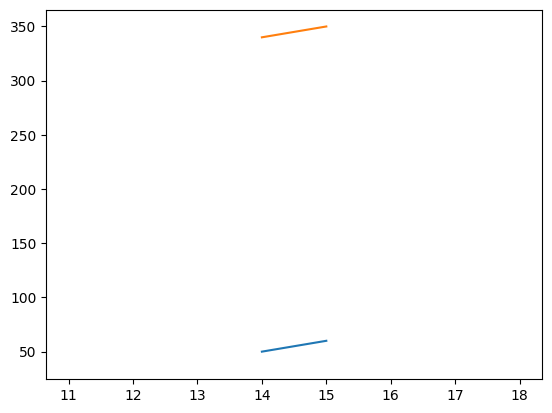

In [28]:
plt.plot(wind_max_var[50:100])
plt.plot(wind_min_var[50:100])

In [30]:
Full_cleaned_METAR_dict.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure', 'wind_min_var', 'bool_wind_min_var', 'bool_wind_max_var'])

In [753]:
file_path = '../results/Full_Cleaned_METAR_dict.pkl'  # Specify the file path and name

# Save the dictionary into a binary file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(Full_Cleaned_METAR_dict, file)
print(f"The data has been saved to {file_path}.")

The data has been saved to ../results/Full_Cleaned_METAR_dict.pkl.


#### Create Example for Input and the input processing code.

In [109]:
A

[Cloud[height=1600, quantity=CloudQuantity.SCT, type=None],
 Cloud[height=2700, quantity=CloudQuantity.BKN, type=None],
 Cloud[height=25000, quantity=CloudQuantity.OVC, type=None]]